# 1 環境とエージェント

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(1)

In [2]:
class Environment:
    
    def __init__(self, size=3, lucky=[]):
        
        self.size = size
        self.lucky = lucky
        self.goal = (size-1, size-1)
        self.states = [(x, y) for x in range(size) for y in range(size)]
        
        self.value = {}
        for s in self.states:
            self.value[s] = 0
            
    def next_state(self, s, a):
        
        s_next = (s[0] + a[0], s[1] + a[1])
        
        if s == self.goal:
            return s
        
        if s_next not in self.states:
            return s
        
        if s_next in self.lucky:
            if np.random.random() < 0.8:
                return self.goal
            else:
                return s_next
        
        return s_next
    
    def reward(self, s, s_next):
        
        if s == self.goal:
            return -1
        
        if s_next == self.goal:
            return 0
        
        return -1            

In [3]:
class Agent():
    
    def __init__(self, environment):
        
        self.actions = [(-1, 0), (0, -1), (1, 0), (0, 1)]
        self.environment = environment
        
        
        self.policy = {}
        for s in self.environment.states:
            self.policy[s] = self.actions[np.random.randint(2,4)]
            
        self.q = {}

        for s in self.environment.states:
            for a in self.actions:
                self.q[(s, a)] = 0
                
    def action(self, s, a):

        s_next = self.environment.next_state(s, a)
        r = self.environment.reward(s, s_next)

        return r, s_next

# 2 SARSA

In [4]:
def get_episode(agent, epsilon=0.1, alpha=0.1):
    
    s = agent.environment.states[np.random.randint(agent.environment.size**2-1)]
    
    episode = []

    if np.random.random() < epsilon:
            a = agent.actions[np.random.randint(2,4)]
    else:
            a = agent.policy[s]
            
    while True:
            
        r, s_next = agent.action(s, a)
        episode.append((s, a, r))        
        
        if np.random.random() < epsilon:
            a_next = agent.actions[np.random.randint(2,4)]
        else:
            a_next = agent.policy[s_next]

        agent.q[(s, a)] += alpha*(r + agent.q[(s_next, a_next)] - agent.q[(s, a)])
        agent.environment.value[s] = policy(agent, s)
        
        if s_next == agent.environment.goal:
            break
        s = s_next
        a = a_next

In [5]:
def policy(agent, s):
    
    q_max = -100
    a_max = None
    for a in agent.actions:

        if agent.q[(s, a)]>q_max:
            q_max = agent.q[(s, a)]
            a_max = a
            
    agent.policy[s] = a_max

    return q_max

In [6]:
def train(agent, epsilon=0.1, alpha=0.1, num=100):
    
    for _ in range(num):
        get_episode(agent, epsilon, alpha)

    show_values(agent)
    show_policy(agent)    

# 3 可視化用関数

In [7]:
def show_maze(environment):
    size = environment.size
    fig = plt.figure(figsize=(3,3))

    plt.plot([-0.5, -0.5], [-0.5, size-0.5], color='k')
    plt.plot([-0.5, size-0.5], [size-0.5, size-0.5], color='k')
    plt.plot([size-0.5, -0.5], [-0.5, -0.5], color='k')
    plt.plot([size-0.5, size-0.5], [size-0.5, -0.5], color='k')
    
    c = 0
    for i in range(size):
        for j in range(size):
            plt.text(i, j, "{}".format(i+size*j), size=20, ha="center", va="center")
            if (i,j) in environment.lucky:
                x = np.array([i-0.5,i-0.5,i+0.5,i+0.5])
                y = np.array([j-0.5,j+0.5,j+0.5,j-0.5])
                plt.fill(x,y, color="lightgreen")
            c += 1

    plt.axis("off")

In [8]:
def show_values(agent, subplot=None, title='Values'):

    fig = plt.figure(figsize=(3,3))
    result = np.zeros([agent.environment.size, agent.environment.size])
    for (x, y) in agent.environment.states:
        result[y][x]  = agent.environment.value[(x, y)]
        
    sns.heatmap(result, square=True, cbar=False, annot=True, fmt='3.2f', cmap='autumn_r').invert_yaxis()
    plt.axis("off")

In [9]:
 def show_policy(agent):
    size = agent.environment.size
    fig = plt.figure(figsize=(3,3))

    plt.plot([-0.5, -0.5], [-0.5, size-0.5], color='k')
    plt.plot([-0.5, size-0.5], [size-0.5, size-0.5], color='k')
    plt.plot([size-0.5, -0.5], [-0.5, -0.5], color='k')
    plt.plot([size-0.5, size-0.5], [size-0.5, -0.5], color='k')

    c=0

    for i in range(size):
        for j in range(size):
            if (i,j) in agent.environment.lucky:
                x = np.array([i-0.5,i-0.5,i+0.5,i+0.5])
                y = np.array([j-0.5,j+0.5,j+0.5,j-0.5])
                plt.fill(x,y, color="lightgreen")
            c += 1

    rotation = {(-1, 0): 180, (0, 1): 90, (1, 0): 0, (0, -1): 270}
    for s in agent.environment.states:
        if s == agent.environment.goal:
            direction=None
        else:
            direction = rotation[agent.policy[s]]
        
        if direction != None:
            bbox_props = dict(boxstyle='rarrow')
            plt.text(s[0], s[1], '     ', bbox=bbox_props, size=8, ha='center', va='center', rotation=direction)
                        
    plt.axis("off")

# 4 シミュレーション

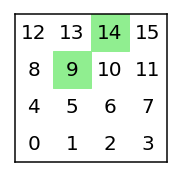

In [10]:
env1 = Environment(size=4, lucky=[(1,2),(2,3)])
agent1 = Agent(env1)
show_maze(env1)

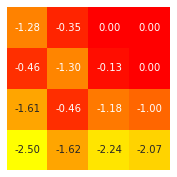

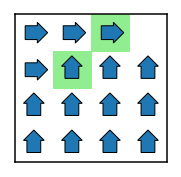

In [11]:
train(agent1, num=10000)